# IMPORTING LIBRARIES

In [115]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics 
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn import multiclass

In [121]:
data=pd.read_csv('zoo.data',sep=',',header=None)
data.columns=["animal_name","hair","feathers","egg","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"]

In [122]:
data.head()

,animal_name,hair,feathers,egg,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [123]:
x1=data.iloc[:,1:17]
y1=data.iloc[:,17]

Y = preprocessing.label_binarize(y1, classes=[1, 2, 3, 4, 5, 6, 7])
train_x, test_x, train_y, test_y = train_test_split(x1, Y, test_size=0.3, random_state=42, stratify=y1)
train_x.shape,test_x.shape,train_y.shape,test_y.shape


((70, 16), (31, 16), (70, 7), (31, 7))

# LINEAR KERNEL

In [91]:
lin_svm=multiclass.OneVsRestClassifier(SVC(kernel="linear"))
params = {
      'estimator__C': [0.5, 1.0, 1.5],
      'estimator__tol': [1e-3, 1e-4, 1e-5],
      'estimator__gamma': [0.001,0.01,0.1,1],
      }
clf_lin=GridSearchCV(lin_svm,params,cv=5)
clf_lin.fit(x_train,y_train)
predictions=clf_lin.predict(x_test)

In [92]:
print(metrics.accuracy_score(y_test,predictions))

0.9523809523809523


In [93]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3

   micro avg       0.95      0.95      0.95        21
   macro avg       0.95      0.95      0.94        21
weighted avg       0.97      0.95      0.95        21
 samples avg       0.95      0.95      0.95        21



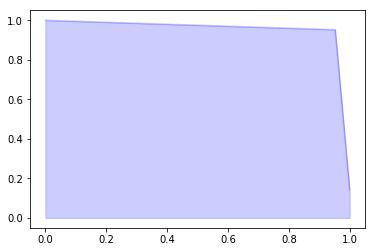

In [94]:
precision = dict()
recall = dict()
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test.ravel(),predictions.ravel())
plt.figure()
plt.plot(recall['micro'], precision['micro'], color='b', alpha=0.2)
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

# Radial Bias KERNEL

In [119]:
rb_svm=multiclass.OneVsRestClassifier(SVC(kernel="rbf"))
params = {
      'estimator__C': [0.5, 1.0, 1.5],
      'estimator__tol': [1e-3, 1e-4, 1e-5],
      'estimator__gamma': [0.001,0.01,0.1,1],
      }
clf_rb=GridSearchCV(rb_svm,params,cv=5)
clf_rb.fit(x_train,y_train)
predictions=clf_lin.predict(x_test)# Radial Bias KERNEL

In [120]:
print(metrics.accuracy_score(y_test,predictions))

0.9523809523809523


In [97]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3

   micro avg       0.95      0.95      0.95        21
   macro avg       0.95      0.95      0.94        21
weighted avg       0.97      0.95      0.95        21
 samples avg       0.95      0.95      0.95        21



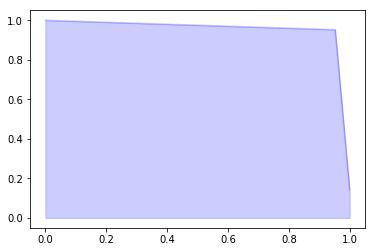

In [98]:
precision = dict()
recall = dict()
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test.ravel(),predictions.ravel())
plt.figure()
plt.plot(recall['micro'], precision['micro'], color='b', alpha=0.2)
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

# POLYNOMIAL KERNEL

In [124]:
poly_svm=multiclass.OneVsRestClassifier(SVC(kernel="poly"))
params = {
      'estimator__C': [0.5, 1.0, 1.5],
      'estimator__tol': [1e-3, 1e-4, 1e-5],
      'estimator__gamma': [0.001,0.01,0.1,1],
      'estimator__degree':[2,3,4]
      }
clf_poly=GridSearchCV(poly_svm,params,cv=5)
clf_poly.fit(x_train,y_train)
predictions=clf_poly.predict(x_test)

In [125]:
print(metrics.accuracy_score(y_test,predictions))

0.9523809523809523


In [126]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3

   micro avg       0.95      0.95      0.95        21
   macro avg       0.95      0.95      0.94        21
weighted avg       0.97      0.95      0.95        21
 samples avg       0.95      0.95      0.95        21



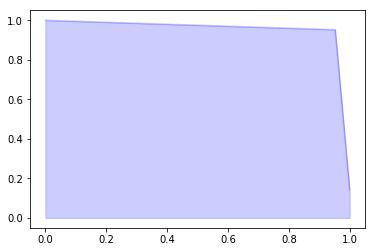

In [102]:
precision = dict()
recall = dict()
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test.ravel(),predictions.ravel())
plt.figure()
plt.plot(recall['micro'], precision['micro'], color='b', alpha=0.2)
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

# SIGMOID KERNEL

In [130]:
sig_svm=multiclass.OneVsRestClassifier(SVC(kernel="sigmoid"))
params = {
      'estimator__C': [0.5, 1.0, 1.5],
      'estimator__tol': [1e-3, 1e-4, 1e-5],
      'estimator__gamma': [0.001,0.01,0.1,1],
      }
clf_sig=GridSearchCV(sig_svm,params,cv=5)
clf_sig.fit(x_train,y_train)
predictions=clf_sig.predict(x_test)

In [131]:
print(metrics.accuracy_score(y_test,predictions))

0.47619047619047616


In [132]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3

   micro avg       1.00      0.48      0.65        21
   macro avg       0.29      0.29      0.29        21
weighted avg       0.48      0.48      0.48        21
 samples avg       0.48      0.48      0.48        21



/home/anuj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anuj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


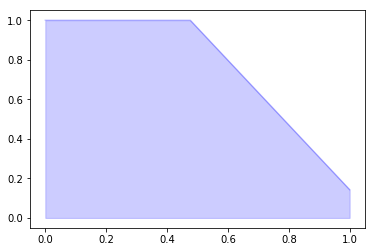

In [133]:
precision = dict()
recall = dict()
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test.ravel(),predictions.ravel())
plt.figure()
plt.plot(recall['micro'], precision['micro'], color='b', alpha=0.2)
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

# USING NEURAL NETWORK

In [109]:
data2=pd.read_csv('zoo.data',sep=',',header=None)
data2.columns=["animal_name","hair","feathers","egg","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","type"]
data2.head()

x1=data2.iloc[:,1:17]
y1=data2.iloc[:,17]

Y = preprocessing.label_binarize(y1, classes=[1, 2, 3, 4, 5, 6, 7])
train_x, test_x, train_y, test_y = train_test_split(x1, Y, test_size=0.3, random_state=42, stratify=y1)
train_x.shape,test_x.shape,train_y.shape,test_y.shape


from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(100, ),learning_rate_init=0.005)
clf.fit(train_x,train_y)
predictions=clf.predict(test_x)

/home/anuj/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [110]:
print(metrics.accuracy_score(test_y,predictions))

0.9354838709677419


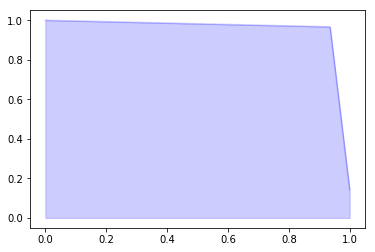

In [112]:
precision = dict()
recall = dict()
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(test_y.ravel(),predictions.ravel())
plt.figure()
plt.plot(recall['micro'], precision['micro'], color='b', alpha=0.2)
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')